In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_colwidth",200)

In [2]:
df_train = pd.read_csv('train_loan.csv')
df_test = pd.read_csv('test_loan.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Amount_Term'>

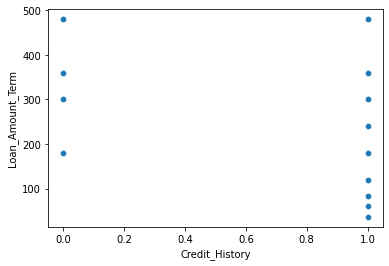

In [6]:
sns.scatterplot(y=df_train['Loan_Amount_Term'], x=df_train['Credit_History'])

In [7]:
df_train.groupby('Credit_History')['Loan_Amount_Term'].mean()

Credit_History
0.0    341.927711
1.0    342.192719
Name: Loan_Amount_Term, dtype: float64

In [8]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
print(df_train['Gender'].mode()[0])
print(df_train['LoanAmount'].mean())

Male
146.41216216216216


In [11]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean())
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

In [12]:
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['Married'] = df_test['Married'].fillna(df_test['Married'].mode()[0])
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean())
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

<AxesSubplot:>

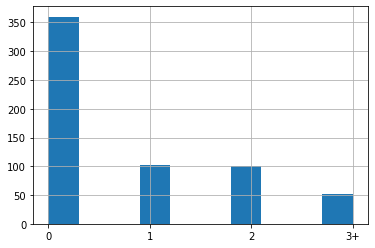

In [13]:
df_train['Dependents'].hist()

In [14]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
df_train['Total_Income'] = np.log(df_train['ApplicantIncome'] +df_train['CoapplicantIncome'])
df_test['Total_Income'] = np.log(df_test['ApplicantIncome'] +df_test['CoapplicantIncome'])
df_test['EMI'] = df_test['LoanAmount']/df_test['Loan_Amount_Term']
df_train['EMI'] = df_train['LoanAmount']/df_train['Loan_Amount_Term']

In [16]:
df_train['Dependents'] = df_train['Dependents'].replace('3+',3)
df_test['Dependents'] = df_test['Dependents'].replace('3+',3)

In [17]:
df_train['Dependents'] = df_train['Dependents'].astype(int)
df_test['Dependents'] = df_test['Dependents'].astype(int)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Loan_Status'] = le.fit_transform(df_train['Loan_Status'])

In [19]:
le1 = LabelEncoder()
df_train['Property_Area'] = le1.fit_transform(df_train['Property_Area'])
df_test['Property_Area'] = le1.transform(df_test['Property_Area'])

In [20]:
df_train.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,2,1,8.674026,0.406700
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,0,0,8.714568,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,2,1,8.006368,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,2,1,8.505323,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,2,1,8.699515,0.391667
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,2,1,9.170872,0.741667
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,2,1,8.255569,0.263889
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,1,0,8.619750,0.438889
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,2,1,8.618305,0.466667
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,1,0,10.077819,0.969444


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
 13  Total_Income       614 non-null    float64
 14  EMI                614 non-null    float64
dtypes: float64(6), int32(3), int64(1), object(5)
memory usage: 64.9+ KB


In [22]:
cat_features=[i for i in df_train.columns if df_train.dtypes[i]=='object']

In [23]:
num_features=[i for i in df_train.columns if df_train.dtypes[i]!='object']

In [24]:
cat_features = cat_features[1:]
cat_features

['Gender', 'Married', 'Education', 'Self_Employed']

In [25]:
num_features

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Total_Income',
 'EMI']

In [26]:
df_train.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118,0.112812,0.103058
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710,0.717829,0.320433
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187,0.383827,0.135761
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416,0.687552,0.491172
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974,-0.055320,-0.500000
Credit_History,-0.040160,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556,0.020791,0.014440
Property_Area,-0.000244,-0.009500,0.010522,-0.044776,-0.077620,0.001963,1.000000,0.032112,-0.046246,0.039136
Loan_Status,0.010118,-0.004710,-0.059187,-0.036416,-0.020974,0.540556,0.032112,1.000000,0.007240,-0.013793
Total_Income,0.112812,0.717829,0.383827,0.687552,-0.055320,0.020791,-0.046246,0.007240,1.000000,0.378505
EMI,0.103058,0.320433,0.135761,0.491172,-0.500000,0.014440,0.039136,-0.013793,0.378505,1.000000


In [27]:
# df_train['ApplicantIncome'] = np.log(df_train['ApplicantIncome'])
# df_train['CoapplicantIncome'] = np.log(1.000001+ df_train['CoapplicantIncome'])
# df_train['LoanAmount'] = np.log(1.000001+df_train['LoanAmount'])

In [28]:
# df_test['ApplicantIncome'] = np.log(df_test['ApplicantIncome'])
# df_test['CoapplicantIncome'] = np.log(1.000001+ df_test['CoapplicantIncome'])
# df_test['LoanAmount'] = np.log(1.000001+df_test['LoanAmount'])

In [29]:
#df_train[num_features].hist(bins=15,figsize=(15,6),layout=(2,3))

In [30]:
# fig, ax = plt.subplots(2, 3, figsize=(16, 10))
# for variable, subplot in zip(cat_features, ax.flatten()):
#     sns.countplot(df_train['Credit_History'],hue = df_train[variable],ax=subplot)

In [31]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# for variable, subplot in zip(cat_features, ax.flatten()):
#     sns.countplot(df_train[variable], ax=subplot)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)

In [32]:
# for num_var in num_features:
#     fig, ax = plt.subplots(2, 3, figsize=(16, 10))
#     for variable, subplot in zip(cat_features, ax.flatten()):
#         sns.boxplot(x=variable, y= num_var,data=df_train, ax=subplot)

In [33]:
#sns.scatterplot(x=df_train['Credit_History'],y=df_train['LoanAmount'])

In [34]:
#sns.pairplot(df_train)

In [35]:
X= df_train.drop(['Loan_Status','Loan_ID','Education','Married','Self_Employed','Gender','ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term'],axis=1)
y= df_train['Loan_Status']
df_test_x = df_test.drop(['Loan_ID','Education','Married','Self_Employed','Gender','ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term'],axis=1)
#print(X,Y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [37]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)

In [38]:
# from sklearn.linear_model import RidgeClassifier
# classifier = RidgeClassifier(random_state = 0)
# classifier.fit(X_train, y_train)

In [39]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

In [40]:
# from sklearn.ensemble import GradientBoostingClassifier
# classifier = GradientBoostingClassifier(n_estimators = 100,max_features='auto',max_depth=1,min_samples_leaf=5,min_samples_split=5)
# # fit the model with the training data
# classifier.fit(X_train, y_train)

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1500,max_features='sqrt',max_depth=2,min_samples_split=5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       min_samples_split=5, n_estimators=1500, random_state=0)

In [42]:
# from catboost import CatBoostClassifier
# classifier = CatBoostClassifier()
# classifier.fit(X_train, y_train, ['Dependents','Property_Area'])

In [43]:
# pd.DataFrame({'feature_importance': classifier.get_feature_importance(), 
#               'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
#                                                            ascending=False)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10 15]
 [ 1 67]]


0.8279569892473119

In [46]:
accuracy_score(y_train,classifier.predict(X_train))

0.8080614203454894

In [47]:
Y_pre = classifier.predict(df_test.iloc[:,[3,10,11,12,13]])

In [48]:
Y_pred = classifier.predict(df_test_x)

In [49]:
print(type(Y_pre[0]))
#print(type(Y_pred[0][0]))

<class 'numpy.int32'>


<AxesSubplot:ylabel='count'>

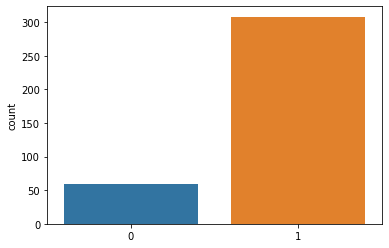

In [50]:
sns.countplot(Y_pred)

In [51]:
Y_pre = np.reshape(Y_pred,(-1,1))
print(Y_pred.shape)

(367,)


In [52]:
numpy_array = np.concatenate((df_test.iloc[:,[0]].values,Y_pre),axis=1)
df2 = pd.DataFrame(numpy_array, columns =['Loan_ID','Loan_Status'])
df2['Loan_Status'] = df2['Loan_Status'].replace(1,'Y')
df2['Loan_Status'] = df2['Loan_Status'].replace(0,'N')
df2.to_csv('Output_loan1.csv',index=False)
print(df2)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]
